### Problem statement

The goal of the problem is to predict whether a passenger was delighted considering his/her overall travel experience of traveling in Shinkansen (Bullet Train). For each passenger id in the test set, you must predict the “Overall_Experience” level.

### Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn import metrics

### Importing the dataset

In [2]:
tsf=pd.read_csv("Surveydata_train.csv")
tf=pd.read_csv("Traveldata_train.csv")
tsft=pd.read_csv("Surveydata_test.csv")
tft=pd.read_csv("Traveldata_test.csv")
submit=pd.read_csv("Sample_Submission.csv")

### Separating train and test data

In [3]:
tsf.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [4]:
tsf.describe(include="all")

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
count,9.437900e+04,94379.000000,94318,94379,85449,85638,94349,94349,94361,94288,94306,86778,94289,94237,94302,94373,94373
unique,NaN,NaN,6,2,6,6,6,6,6,6,6,6,6,5,6,6,6
top,NaN,NaN,acceptable,Green Car,good,acceptable,manageable,good,good,good,good,good,good,good,good,good,good
freq,NaN,NaN,21158,47435,19574,18468,24173,22835,30446,30016,28909,27265,28870,34944,26502,35427,25533
mean,9.884719e+07,0.546658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.724501e+04,0.497821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9.880000e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.882360e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.884719e+07,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.887078e+07,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
tsft.describe(include="all")

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
count,3.560200e+04,35580,35602,32277,32245,35590,35590,35594,35576,35584,32730,35577,35562,35580,35600,35600
unique,NaN,6,2,6,6,5,6,6,5,6,5,6,5,5,5,6
top,NaN,acceptable,Ordinary,good,acceptable,manageable,good,good,good,good,good,good,good,good,good,good
freq,NaN,8003,17860,7361,7133,9364,8743,11436,11487,11025,10222,10842,13291,9982,13421,9680
mean,9.991780e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.027756e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9.990000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.990890e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.991780e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.992670e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
tsf.drop("ID",axis=1,inplace=True)

In [7]:
tsf.shape

(94379, 16)

In [8]:
tf.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [9]:
tf.shape

(94379, 9)

In [10]:
tf.drop("ID",axis=1,inplace=True)

In [11]:
tf_train = pd.concat([tsf, tf], axis=1)

In [12]:
tf_train.shape

(94379, 24)

In [13]:
tsft.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [14]:
tsft.shape

(35602, 16)

In [15]:
tft.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [16]:
tft.drop("ID", axis=1 , inplace=True)

In [17]:
tft.shape

(35602, 8)

In [18]:
tf_test=pd.concat([tsft,tft], axis=1)

In [19]:
tf_test.shape

(35602, 24)

### Data preprocessing of train data

In [20]:
tf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Seat_comfort             94318 non-null  object 
 2   Seat_Class               94379 non-null  object 
 3   Arrival_time_convenient  85449 non-null  object 
 4   Catering                 85638 non-null  object 
 5   Platform_location        94349 non-null  object 
 6   Onboardwifi_service      94349 non-null  object 
 7   Onboard_entertainment    94361 non-null  object 
 8   Online_support           94288 non-null  object 
 9   Onlinebooking_Ease       94306 non-null  object 
 10  Onboard_service          86778 non-null  object 
 11  Leg_room                 94289 non-null  object 
 12  Baggage_handling         94237 non-null  object 
 13  Checkin_service          94302 non-null  object 
 14  Cleanliness           

In [21]:
tf_train.head()

,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,...,need improvement,poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,...,good,good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,...,excellent,excellent,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,...,acceptable,acceptable,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,...,good,good,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [22]:
tf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Seat_comfort             94318 non-null  object 
 2   Seat_Class               94379 non-null  object 
 3   Arrival_time_convenient  85449 non-null  object 
 4   Catering                 85638 non-null  object 
 5   Platform_location        94349 non-null  object 
 6   Onboardwifi_service      94349 non-null  object 
 7   Onboard_entertainment    94361 non-null  object 
 8   Online_support           94288 non-null  object 
 9   Onlinebooking_Ease       94306 non-null  object 
 10  Onboard_service          86778 non-null  object 
 11  Leg_room                 94289 non-null  object 
 12  Baggage_handling         94237 non-null  object 
 13  Checkin_service          94302 non-null  object 
 14  Cleanliness           

In [23]:
tf_train.isnull().sum()

Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
Gender                       77
CustomerType               8951
Age                          33
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
dtype: int64

In [24]:
tf_train['Overall_Experience']=tf_train['Overall_Experience'].astype("object")

In [25]:
for i in tf_train.columns:
    if (tf_train[i].dtype=='object'):
        tf_train[i].fillna(tf_train[i].mode()[0], inplace=True)
    elif (tf_train[i].dtype=='float64' or tf_train[i].dtype=='int64'):
        tf_train[i].fillna(tf_train[i].mean(), inplace=True)

In [26]:
tf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Seat_comfort             94379 non-null  object 
 2   Seat_Class               94379 non-null  object 
 3   Arrival_time_convenient  94379 non-null  object 
 4   Catering                 94379 non-null  object 
 5   Platform_location        94379 non-null  object 
 6   Onboardwifi_service      94379 non-null  object 
 7   Onboard_entertainment    94379 non-null  object 
 8   Online_support           94379 non-null  object 
 9   Onlinebooking_Ease       94379 non-null  object 
 10  Onboard_service          94379 non-null  object 
 11  Leg_room                 94379 non-null  object 
 12  Baggage_handling         94379 non-null  object 
 13  Checkin_service          94379 non-null  object 
 14  Cleanliness           

In [27]:
tf_train["Gender"].value_counts()

Female    47892
Male      46487
Name: Gender, dtype: int64

In [28]:
tf_train.isnull().sum()

Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
dtype: int64

In [29]:
tf_train['Overall_Experience']=tf_train['Overall_Experience'].astype("object")

In [30]:
tf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  object 
 1   Seat_comfort             94379 non-null  object 
 2   Seat_Class               94379 non-null  object 
 3   Arrival_time_convenient  94379 non-null  object 
 4   Catering                 94379 non-null  object 
 5   Platform_location        94379 non-null  object 
 6   Onboardwifi_service      94379 non-null  object 
 7   Onboard_entertainment    94379 non-null  object 
 8   Online_support           94379 non-null  object 
 9   Onlinebooking_Ease       94379 non-null  object 
 10  Onboard_service          94379 non-null  object 
 11  Leg_room                 94379 non-null  object 
 12  Baggage_handling         94379 non-null  object 
 13  Checkin_service          94379 non-null  object 
 14  Cleanliness           

In [31]:
tf_train["Cleanliness"].value_counts()

good                35433
excellent           26053
acceptable          17449
need improvement     9806
poor                 5633
extremely poor          5
Name: Cleanliness, dtype: int64

In [32]:
tf_train["Checkin_service"].value_counts()

good                26579
acceptable          25803
excellent           19641
need improvement    11218
poor                11137
extremely poor          1
Name: Checkin_service, dtype: int64

In [33]:
tf_train["Onboard_service"].value_counts()

good                34866
excellent           21272
acceptable          18071
need improvement    11390
poor                 8776
extremely poor          4
Name: Onboard_service, dtype: int64

In [34]:
tf_train["Online_support"].value_counts()

good                30107
excellent           25894
acceptable          15702
need improvement    12508
poor                10167
extremely poor          1
Name: Online_support, dtype: int64

In [35]:
tf_train["Platform_location"].value_counts()

manageable           24203
Convinient           21912
need improvement     17832
Inconvinient         16449
very convinient      13981
very inconvinient        2
Name: Platform_location, dtype: int64

In [36]:
tf_train['Platform_location']=np.where(tf_train['Platform_location']=='very inconvinient','very convinient',tf_train['Platform_location'])

In [37]:
tf_train['Online_support']=np.where(tf_train['Online_support']=='extremely poor','poor',tf_train['Online_support'])

In [38]:
tf_train['Onboard_service']=np.where(tf_train['Onboard_service']=='extremely poor','poor',tf_train['Onboard_service'])

In [39]:
tf_train['Checkin_service']=np.where(tf_train['Checkin_service']=='extremely poor','poor',tf_train['Checkin_service'])

In [40]:
tf_train['Cleanliness']=np.where(tf_train['Cleanliness']=='extremely poor','poor',tf_train['Cleanliness'])

In [41]:
tf_train["Cleanliness"].value_counts()

good                35433
excellent           26053
acceptable          17449
need improvement     9806
poor                 5638
Name: Cleanliness, dtype: int64

In [42]:
tf_train["Checkin_service"].value_counts()

good                26579
acceptable          25803
excellent           19641
need improvement    11218
poor                11138
Name: Checkin_service, dtype: int64

In [43]:
tf_train["Onboard_service"].value_counts()

good                34866
excellent           21272
acceptable          18071
need improvement    11390
poor                 8780
Name: Onboard_service, dtype: int64

In [44]:
tf_train["Online_support"].value_counts()

good                30107
excellent           25894
acceptable          15702
need improvement    12508
poor                10168
Name: Online_support, dtype: int64

In [45]:
tf_train["Platform_location"].value_counts()

manageable          24203
Convinient          21912
need improvement    17832
Inconvinient        16449
very convinient     13983
Name: Platform_location, dtype: int64

### Separating the categorical and numerical variables

In [46]:
categorical = []
for col, value in tf_train.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

In [47]:
categorical

['Overall_Experience',
 'Seat_comfort',
 'Seat_Class',
 'Arrival_time_convenient',
 'Catering',
 'Platform_location',
 'Onboardwifi_service',
 'Onboard_entertainment',
 'Online_support',
 'Onlinebooking_Ease',
 'Onboard_service',
 'Leg_room',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding',
 'Gender',
 'CustomerType',
 'TypeTravel',
 'Travel_Class']

In [48]:
numerical = tf_train.columns.difference(categorical)
tf_train_num = tf_train[numerical]

### Outlier treatment

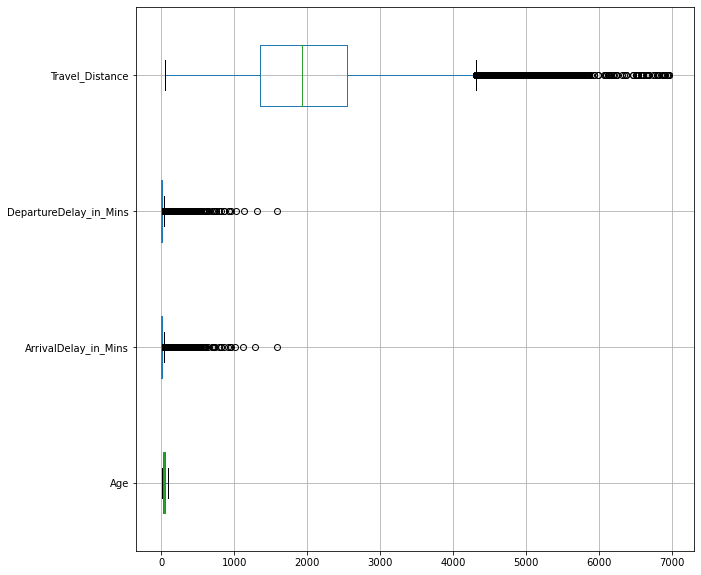

In [49]:
plt.figure(figsize=(10,10))
tf_train_num.boxplot(vert=0)
plt.show()

In [50]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [51]:
for column in tf_train_num.columns:
    lr,ur=remove_outlier(tf_train_num[column])
    tf_train_num[column]=np.where(tf_train_num[column]>ur,ur,tf_train_num[column])
    tf_train_num[column]=np.where(tf_train_num[column]<lr,lr,tf_train_num[column])

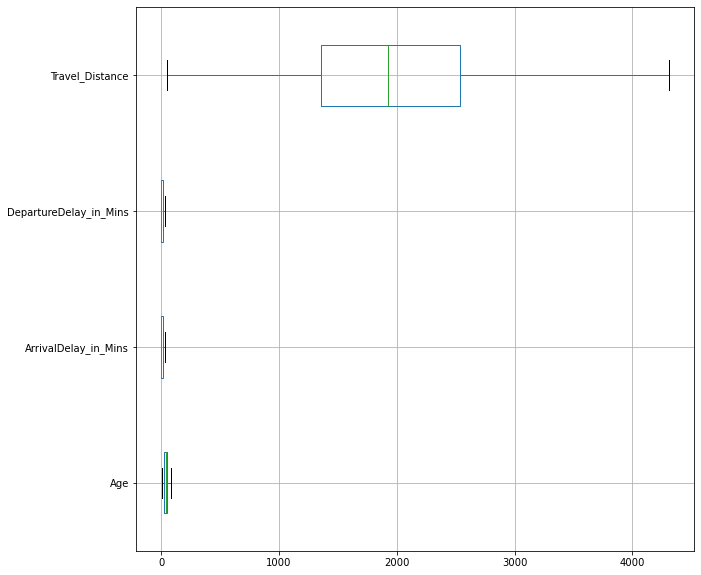

In [52]:
plt.figure(figsize=(10,10))
tf_train_num.boxplot(vert=0)
plt.show()

In [53]:
tf_train_num.head()

,Age,ArrivalDelay_in_Mins,DepartureDelay_in_Mins,Travel_Distance
0,52.0,5.0,0.0,272.0
1,48.0,0.0,9.0,2200.0
2,43.0,32.5,30.0,1061.0
3,44.0,18.0,13.0,780.0
4,50.0,0.0,0.0,1981.0


In [54]:
tf_train_num= tf_train_num.apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [55]:
tf_train_num.head()

,Age,ArrivalDelay_in_Mins,DepartureDelay_in_Mins,Travel_Distance
0,0.576923,0.153846,0.000000,0.052156
1,0.525641,0.000000,0.300000,0.505110
2,0.461538,1.000000,1.000000,0.237519
3,0.474359,0.553846,0.433333,0.171502
4,0.551282,0.000000,0.000000,0.453659


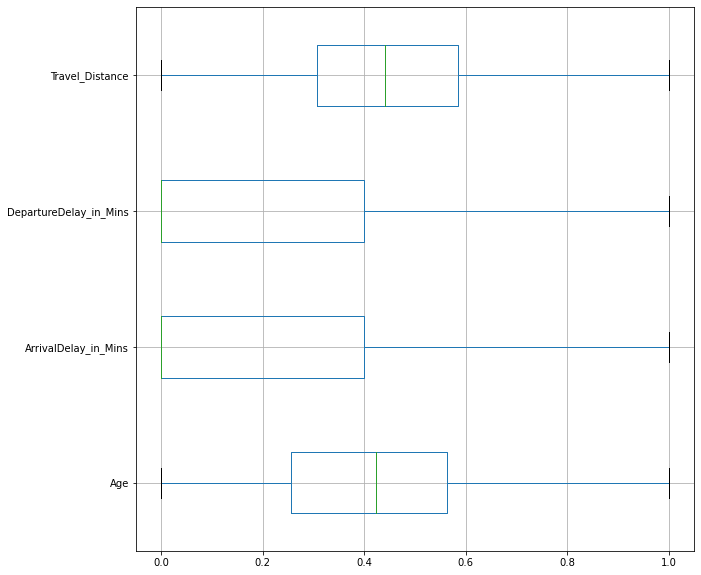

In [56]:
plt.figure(figsize=(10,10))
tf_train_num.boxplot(vert=0)
plt.show()

In [57]:
tf_train_cat = tf_train[categorical]
tf_train_cat = tf_train_cat.drop(['Overall_Experience'], axis=1) # Dropping the target column

In [58]:
tf_train_cat.shape

(94379, 19)

In [59]:
tf_train_cat = pd.get_dummies(tf_train_cat)
tf_train_cat.shape

(94379, 88)

In [60]:
tf_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 88 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Seat_comfort_acceptable                   94379 non-null  uint8
 1   Seat_comfort_excellent                    94379 non-null  uint8
 2   Seat_comfort_extremely poor               94379 non-null  uint8
 3   Seat_comfort_good                         94379 non-null  uint8
 4   Seat_comfort_need improvement             94379 non-null  uint8
 5   Seat_comfort_poor                         94379 non-null  uint8
 6   Seat_Class_Green Car                      94379 non-null  uint8
 7   Seat_Class_Ordinary                       94379 non-null  uint8
 8   Arrival_time_convenient_acceptable        94379 non-null  uint8
 9   Arrival_time_convenient_excellent         94379 non-null  uint8
 10  Arrival_time_convenient_extremely poor    94379 non-null  

In [61]:
tf_train_final = pd.concat([tf_train_num, tf_train_cat], axis=1)

In [62]:
tf_train_final.head()

,Age,ArrivalDelay_in_Mins,DepartureDelay_in_Mins,Travel_Distance,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,...,Online_boarding_need improvement,Online_boarding_poor,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
0,0.576923,0.153846,0.000000,0.052156,0,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,0.525641,0.000000,0.300000,0.505110,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,1
2,0.461538,1.000000,1.000000,0.237519,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0
3,0.474359,0.553846,0.433333,0.171502,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,0.551282,0.000000,0.000000,0.453659,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [63]:
tf_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 92 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       94379 non-null  float64
 1   ArrivalDelay_in_Mins                      94379 non-null  float64
 2   DepartureDelay_in_Mins                    94379 non-null  float64
 3   Travel_Distance                           94379 non-null  float64
 4   Seat_comfort_acceptable                   94379 non-null  uint8  
 5   Seat_comfort_excellent                    94379 non-null  uint8  
 6   Seat_comfort_extremely poor               94379 non-null  uint8  
 7   Seat_comfort_good                         94379 non-null  uint8  
 8   Seat_comfort_need improvement             94379 non-null  uint8  
 9   Seat_comfort_poor                         94379 non-null  uint8  
 10  Seat_Class_Green Car              

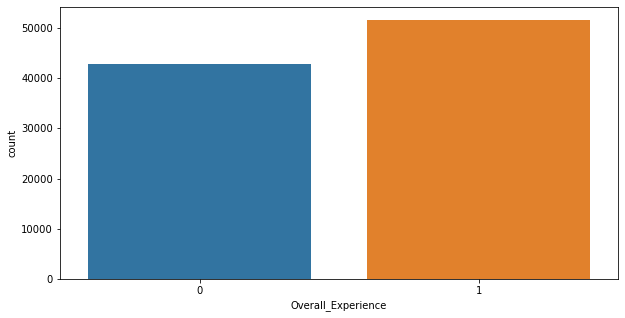

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(data=tf_train,x='Overall_Experience')
plt.show()

In [65]:
x_train=tf_train_final #independent variables
y_train=tf_train['Overall_Experience'].astype('int') #dependent variables

In [66]:
x_train.shape

(94379, 92)

In [67]:
y_train.shape

(94379,)

### Data preprocessing of test data

In [68]:
tf_test.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,...,excellent,poor,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,...,excellent,acceptable,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,...,need improvement,excellent,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,...,excellent,poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,...,excellent,excellent,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [69]:
tf_test.shape

(35602, 24)

In [70]:
tf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_time_convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_location        35590 non-null  object 
 6   Onboardwifi_service      35590 non-null  object 
 7   Onboard_entertainment    35594 non-null  object 
 8   Online_support           35576 non-null  object 
 9   Onlinebooking_Ease       35584 non-null  object 
 10  Onboard_service          32730 non-null  object 
 11  Leg_room                 35577 non-null  object 
 12  Baggage_handling         35562 non-null  object 
 13  Checkin_service          35580 non-null  object 
 14  Cleanliness           

In [71]:
tf_test.drop('ID', axis=1, inplace=True)

In [72]:
tf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Seat_comfort             35580 non-null  object 
 1   Seat_Class               35602 non-null  object 
 2   Arrival_time_convenient  32277 non-null  object 
 3   Catering                 32245 non-null  object 
 4   Platform_location        35590 non-null  object 
 5   Onboardwifi_service      35590 non-null  object 
 6   Onboard_entertainment    35594 non-null  object 
 7   Online_support           35576 non-null  object 
 8   Onlinebooking_Ease       35584 non-null  object 
 9   Onboard_service          32730 non-null  object 
 10  Leg_room                 35577 non-null  object 
 11  Baggage_handling         35562 non-null  object 
 12  Checkin_service          35580 non-null  object 
 13  Cleanliness              35600 non-null  object 
 14  Online_boarding       

In [73]:
tf_test.isnull().sum()

Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
Gender                       30
CustomerType               3383
Age                          11
TypeTravel                 3448
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       29
ArrivalDelay_in_Mins        123
dtype: int64

In [74]:
#imputing the missing values
for i in tf_test.columns:
    if (tf_test[i].dtype=='object'):
        tf_test[i].fillna(tf_test[i].mode()[0], inplace=True)
    elif (tf_test[i].dtype=='float64' or tf_test[i].dtype=='int64'):
        tf_test[i].fillna(tf_test[i].mean(), inplace=True)

In [75]:
tf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Seat_comfort             35602 non-null  object 
 1   Seat_Class               35602 non-null  object 
 2   Arrival_time_convenient  35602 non-null  object 
 3   Catering                 35602 non-null  object 
 4   Platform_location        35602 non-null  object 
 5   Onboardwifi_service      35602 non-null  object 
 6   Onboard_entertainment    35602 non-null  object 
 7   Online_support           35602 non-null  object 
 8   Onlinebooking_Ease       35602 non-null  object 
 9   Onboard_service          35602 non-null  object 
 10  Leg_room                 35602 non-null  object 
 11  Baggage_handling         35602 non-null  object 
 12  Checkin_service          35602 non-null  object 
 13  Cleanliness              35602 non-null  object 
 14  Online_boarding       

In [76]:
tf_test["Cleanliness"].value_counts()

good                13423
excellent            9900
acceptable           6534
need improvement     3607
poor                 2138
Name: Cleanliness, dtype: int64

In [77]:
tf_test["Checkin_service"].value_counts()

good                10004
acceptable           9740
excellent            7375
need improvement     4262
poor                 4221
Name: Checkin_service, dtype: int64

In [78]:
tf_test["Onboard_service"].value_counts()

good                13094
excellent            7941
acceptable           6770
need improvement     4385
poor                 3412
Name: Onboard_service, dtype: int64

In [79]:
tf_test["Online_support"].value_counts()

good                11513
excellent            9665
acceptable           5902
need improvement     4755
poor                 3767
Name: Online_support, dtype: int64

In [80]:
tf_test["Platform_location"].value_counts()

manageable          9376
Convinient          8178
need improvement    6703
Inconvinient        6134
very convinient     5211
Name: Platform_location, dtype: int64

In [81]:
#creating a list of categorical variables
categoricals1 = []
for col, value in tf_test.iteritems():
    if value.dtype == 'object':
        categoricals1.append(col)

In [82]:
categoricals1

['Seat_comfort',
 'Seat_Class',
 'Arrival_time_convenient',
 'Catering',
 'Platform_location',
 'Onboardwifi_service',
 'Onboard_entertainment',
 'Online_support',
 'Onlinebooking_Ease',
 'Onboard_service',
 'Leg_room',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding',
 'Gender',
 'CustomerType',
 'TypeTravel',
 'Travel_Class']

In [83]:
numericals1 = tf_test.columns.difference(categoricals1)
tf_test_num = tf_test[numericals1]

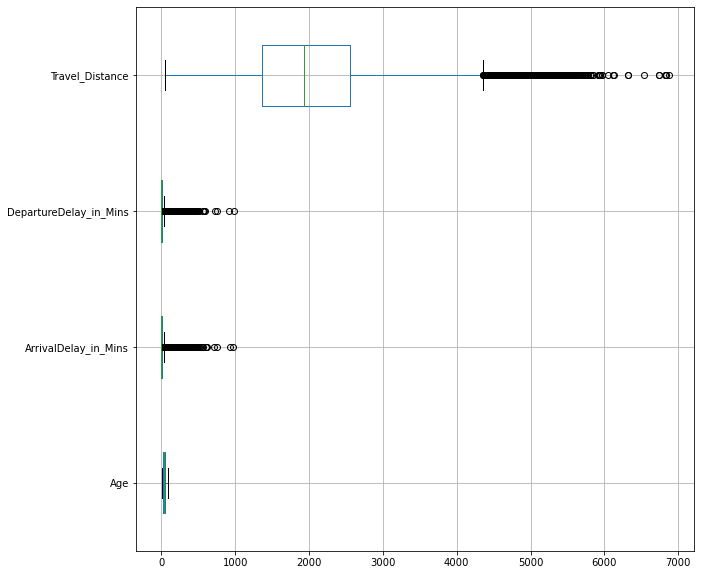

In [84]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
tf_test_num.boxplot(vert=0)
plt.show()

In [85]:
for column in tf_test_num.columns:
    lr,ur=remove_outlier(tf_test_num[column])
    tf_test_num[column]=np.where(tf_test_num[column]>ur,ur,tf_test_num[column])
    tf_test_num[column]=np.where(tf_test_num[column]<lr,lr,tf_test_num[column])

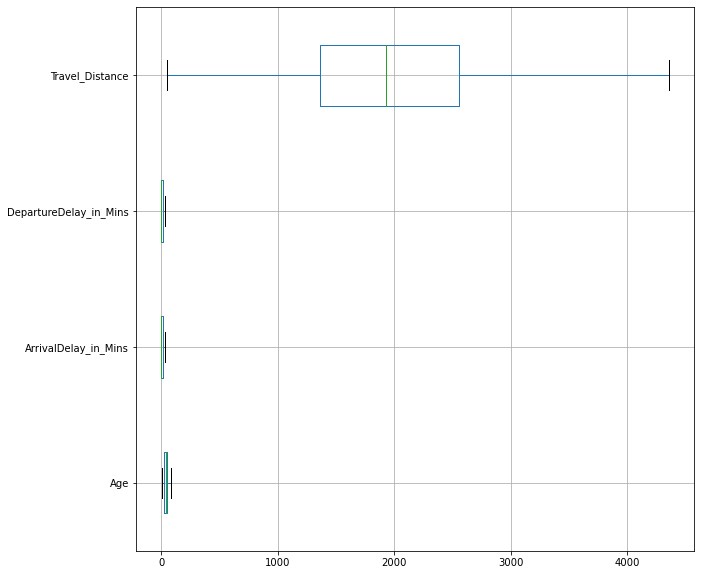

In [86]:
plt.figure(figsize=(10,10))
tf_test_num.boxplot(vert=0)
plt.show()

In [87]:
tf_test_num= tf_test_num.apply(lambda x:(x-x.min()) / (x.max()-x.min()))

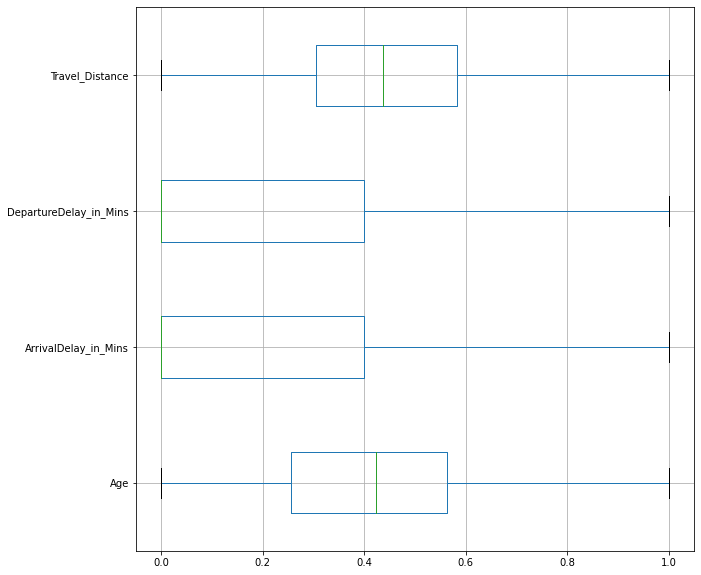

In [88]:
plt.figure(figsize=(10,10))
tf_test_num.boxplot(vert=0)
plt.show()

In [89]:
tf_test_cat = tf_test[categoricals1]

In [90]:
tf_test_cat.shape

(35602, 19)

In [91]:
tf_test_cat = pd.get_dummies(tf_test_cat)

In [92]:
tf_test_cat.shape

(35602, 88)

In [93]:
tf_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 88 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Seat_comfort_acceptable                   35602 non-null  uint8
 1   Seat_comfort_excellent                    35602 non-null  uint8
 2   Seat_comfort_extremely poor               35602 non-null  uint8
 3   Seat_comfort_good                         35602 non-null  uint8
 4   Seat_comfort_need improvement             35602 non-null  uint8
 5   Seat_comfort_poor                         35602 non-null  uint8
 6   Seat_Class_Green Car                      35602 non-null  uint8
 7   Seat_Class_Ordinary                       35602 non-null  uint8
 8   Arrival_time_convenient_acceptable        35602 non-null  uint8
 9   Arrival_time_convenient_excellent         35602 non-null  uint8
 10  Arrival_time_convenient_extremely poor    35602 non-null  

In [94]:
tf_test_cat.head()

,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,Seat_Class_Green Car,Seat_Class_Ordinary,Arrival_time_convenient_acceptable,Arrival_time_convenient_excellent,...,Online_boarding_need improvement,Online_boarding_poor,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
0,1,0,0,0,0,0,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0
2,0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,1
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,1,0


In [95]:
tf_test_final = pd.concat([tf_test_num, tf_test_cat], axis=1)

In [96]:
x_test=tf_test_final

In [97]:
x_test.shape

(35602, 92)

### Model Building

### 1.Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=300, max_depth= 20, max_features= 15, random_state = 1)
rf1.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_features=15, n_estimators=300,
                       random_state=1)

In [100]:
## Performance Matrix on train data set
y_train_predict = rf1.predict(x_train)
model_score =rf1.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.999989404422594
[[42786     0]
 [    1 51592]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42786
           1       1.00      1.00      1.00     51593

    accuracy                           1.00     94379
   macro avg       1.00      1.00      1.00     94379
weighted avg       1.00      1.00      1.00     94379



### 2.Random Forest with Grid Search CV

In [111]:
from sklearn.model_selection import GridSearchCV #it allows us to give different values for each parameter

param_grid = {
    'max_depth': [7, 10], #each decision tree will have max 10 levels
    'max_features': [4, 8], #total no of features to be used for spliting each node
    'min_samples_leaf': [100, 1000], 
    'min_samples_split': [200, 300],
    'n_estimators': [1000, 5000]
}

RF_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = RF_model, param_grid = param_grid, cv = 3) #cv is cross validation cv is 3 means there will be 32*3 different combinations of parameters



In [112]:
grid_search.fit(x_train, y_train) #model fitted with the training dataset

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 8],
                         'min_samples_leaf': [100, 1000],
                         'min_samples_split': [200, 300],
                         'n_estimators': [1000, 5000]})

In [113]:
grid_search.best_params_ #best parameters for the model

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 5000}

In [114]:
best_grid = grid_search.best_estimator_ #the best model that uses the best parameters

In [108]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(x_train)
model_score =best_grid.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9163161296474851
[[38440  4346]
 [ 3552 48041]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     42786
           1       0.92      0.93      0.92     51593

    accuracy                           0.92     94379
   macro avg       0.92      0.91      0.92     94379
weighted avg       0.92      0.92      0.92     94379



### 3. Bagging

In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=280, max_depth= 25, 
                             max_features= 15, random_state = 1,
                             n_jobs = -1)
Bagging_model=BaggingClassifier(base_estimator=rf2,n_estimators=22,random_state=1)
Bagging_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=25,
                                                        max_features=15,
                                                        n_estimators=280,
                                                        n_jobs=-1,
                                                        random_state=1),
                  n_estimators=22, random_state=1)

In [100]:
y_pred14=Bagging_model.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred14})

my_submission.to_csv('Shinkansen submission-14.csv', index=False)

### AdaBoost 1.0

In [102]:
rf3 = RandomForestClassifier(n_estimators=280, max_depth= 25, max_features= 15, random_state = 1)
rf3.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada7 = AdaBoostClassifier(base_estimator=rf3, n_estimators=35, learning_rate=1.0, random_state= 0)
ada7.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=25,
                                                         max_features=15,
                                                         n_estimators=280,
                                                         random_state=1),
                   n_estimators=35, random_state=0)

### AdaBoost 1.1

In [106]:
rf4 = RandomForestClassifier(n_estimators=285, max_depth= 30, max_features= 20, random_state = 1) # 2nd best model
rf4.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada8 = AdaBoostClassifier(base_estimator=rf4, n_estimators=40, learning_rate=1.0, random_state= 1)
ada8.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=30,
                                                         max_features=20,
                                                         n_estimators=285,
                                                         random_state=1),
                   n_estimators=40, random_state=1)

### AdaBoost 1.2

In [108]:
rf5 = RandomForestClassifier(n_estimators=285, max_depth= 32, max_features= 22, random_state = 1)
rf5.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada9 = AdaBoostClassifier(base_estimator=rf5, n_estimators=42, learning_rate=1.0, random_state= 1)
ada9.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=32,
                                                         max_features=22,
                                                         n_estimators=285,
                                                         random_state=1),
                   n_estimators=42, random_state=1)

### AdaBoost 1.3

In [110]:
rf6 = RandomForestClassifier(n_estimators=285, max_depth= 32, max_features= 20, random_state = 1)
rf6.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada10 = AdaBoostClassifier(base_estimator=rf6, n_estimators=40, learning_rate=1.0, random_state= 1)
ada10.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=32,
                                                         max_features=20,
                                                         n_estimators=285,
                                                         random_state=1),
                   n_estimators=40, random_state=1)

### AdaBoost 1.4

In [112]:
rf7 = RandomForestClassifier(n_estimators=285, max_depth= 30, max_features= 22, random_state = 1) #best model
rf7.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada11 = AdaBoostClassifier(base_estimator=rf7, n_estimators=40, learning_rate=1.0, random_state= 1)
ada11.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=30,
                                                         max_features=22,
                                                         n_estimators=285,
                                                         random_state=1),
                   n_estimators=40, random_state=1)

### AdaBoost 1.5

In [114]:
rf8 = RandomForestClassifier(n_estimators=285, max_depth= 30, max_features= 23, random_state = 1) 
rf8.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada12 = AdaBoostClassifier(base_estimator=rf8, n_estimators=40, learning_rate=1.0, random_state= 1)
ada12.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=30,
                                                         max_features=23,
                                                         n_estimators=285,
                                                         random_state=1),
                   n_estimators=40, random_state=1)

### AdaBoost 1.6

In [116]:
rf9 = RandomForestClassifier(n_estimators=285, max_depth= 30, max_features= 22, random_state = 1) 
rf9.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada13 = AdaBoostClassifier(base_estimator=rf9, n_estimators=42, learning_rate=1.0, random_state= 1)
ada13.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=30,
                                                         max_features=22,
                                                         n_estimators=285,
                                                         random_state=1),
                   n_estimators=42, random_state=1)

### AdaBoost 1.7

In [118]:
rf10 = RandomForestClassifier(n_estimators=285, max_depth= 30, max_features= 22, random_state = 1) 
rf10.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada14 = AdaBoostClassifier(base_estimator=rf10, n_estimators=44, learning_rate=1.0, random_state= 1)
ada14.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=30,
                                                         max_features=22,
                                                         n_estimators=285,
                                                         random_state=1),
                   n_estimators=44, random_state=1)

### AdaBoost 1.8

In [122]:
rf11 = RandomForestClassifier(n_estimators=290, max_depth= 30, max_features= 22, random_state = 1) 
rf11.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada15 = AdaBoostClassifier(base_estimator=rf11, n_estimators=44, learning_rate=1.0, random_state= 1)
ada15.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=30,
                                                         max_features=22,
                                                         n_estimators=290,
                                                         random_state=1),
                   n_estimators=44, random_state=1)

### AdaBoost 1.9

In [124]:
rf12 = RandomForestClassifier(n_estimators=295, max_depth= 30, max_features= 22, random_state = 1) 
rf12.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada16 = AdaBoostClassifier(base_estimator=rf11, n_estimators=44, learning_rate=1.0, random_state= 1)
ada16.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=30,
                                                         max_features=22,
                                                         n_estimators=290,
                                                         random_state=1),
                   n_estimators=44, random_state=1)

### AdaBoost 2.0

In [126]:
rf13 = RandomForestClassifier(n_estimators=300, max_depth= 30, max_features= 22, random_state = 1) #best model
rf13.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada17 = AdaBoostClassifier(base_estimator=rf13, n_estimators=44, learning_rate=1.0, random_state= 1)
ada17.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=30,
                                                         max_features=22,
                                                         n_estimators=300,
                                                         random_state=1),
                   n_estimators=44, random_state=1)

### AdaBoost 2.1

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf14 = RandomForestClassifier(n_estimators=305, max_depth= 30, max_features= 22, random_state = 1) 
rf14.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada18 = AdaBoostClassifier(base_estimator=rf14, n_estimators=44, learning_rate=1.0, random_state= 1)
ada18.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=30,
                                                         max_features=22,
                                                         n_estimators=305,
                                                         random_state=1),
                   n_estimators=44, random_state=1)

### AdaBoost 2.2

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf15 = RandomForestClassifier(n_estimators=310, max_depth= 30, max_features= 22, random_state = 1) 
rf15.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada19 = AdaBoostClassifier(base_estimator=rf15, n_estimators=50, learning_rate=1.0, random_state= 1)
ada19.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=30,
                                                         max_features=22,
                                                         n_estimators=310,
                                                         random_state=1),
                   random_state=1)

### AdaBoost 2.3

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf16 = RandomForestClassifier(n_estimators=315, max_depth= 30, max_features= 22, random_state = 1) 
rf16.fit(x_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
ada20 = AdaBoostClassifier(base_estimator=rf16, n_estimators=55, learning_rate=1.0, random_state= 1)
ada20.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=30,
                                                         max_features=22,
                                                         n_estimators=315,
                                                         random_state=1),
                   n_estimators=55, random_state=1)

### Predictions

In [115]:
y_pred2=best_grid.predict(x_test)

In [116]:
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred2})

my_submission.to_csv('Shinkansen submission-2.csv', index=False)

In [118]:
y_pred8=rf1.predict(x_test)

In [119]:
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred8})

my_submission.to_csv('Shinkansen submission-8.csv', index=False)

In [105]:
y_pred16=ada7.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred16})

my_submission.to_csv('Shinkansen submission-16.csv', index=False) #95.47

In [107]:
y_pred17=ada8.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred17})

my_submission.to_csv('Shinkansen submission-17.csv', index=False) #95.64 

In [109]:
y_pred18=ada9.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred18})

my_submission.to_csv('Shinkansen submission-18.csv', index=False) #95.57

In [111]:
y_pred19=ada10.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred19})

my_submission.to_csv('Shinkansen submission-19.csv', index=False) #95.57

In [113]:
y_pred20=ada11.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred20})

my_submission.to_csv('Shinkansen submission-20.csv', index=False) #95.66878 

In [115]:
y_pred21=ada12.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred21})

my_submission.to_csv('Shinkansen submission-21.csv', index=False) #95.66316

In [117]:
y_pred22=ada13.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred22})

my_submission.to_csv('Shinkansen submission-22.csv', index=False) #95.66878

In [119]:
y_pred23=ada14.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred23})

my_submission.to_csv('Shinkansen submission-23.csv', index=False) #95.66878

In [123]:
y_pred24=ada15.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred24})

my_submission.to_csv('Shinkansen submission-24.csv', index=False) #95.67

In [125]:
y_pred25=ada16.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred25})

my_submission.to_csv('Shinkansen submission-25.csv', index=False) #95.67

In [127]:
y_pred26=ada17.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred26})

my_submission.to_csv('Shinkansen submission-26.csv', index=False) #95.69 Best

In [100]:
y_pred27=ada18.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred27})

my_submission.to_csv('Shinkansen submission-27.csv', index=False)

In [102]:
y_pred28=ada19.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred28})

my_submission.to_csv('Shinkansen submission-28.csv', index=False)

In [104]:
y_pred29=ada20.predict(x_test)
my_submission = pd.DataFrame({'ID': submit.ID, 'Overall_Experience': y_pred29})

my_submission.to_csv('Shinkansen submission-29.csv', index=False)